### Импорты

In [1]:
import numpy as np
import pandas as pd

In [2]:
from simpledbf import Dbf5

SQLalchemy is not installed. No support for SQL output.


In [3]:
import matplotlib.pyplot as plt

In [4]:
from plotnine import *

### Загрузка из dbf (файлы баз данных)

загружаем данные из файлов формата `dbf`  с использованием библиотеки `simpledbf`

In [15]:
groups = Dbf5('Part1/groups.dbf', codec='cp1251')
produces = Dbf5('Part1/produces.dbf', codec='cp866')
sales = Dbf5('Part1/sales.dbf', codec='cp866')
stores = Dbf5('Part1/stores.dbf', codec='cp1251')

конвертируем в нативную для `Pandas` форму датафрейма `df`

In [16]:
groups_df = groups.to_dataframe()
produces_df = produces.to_dataframe()
sales_df = sales.to_dataframe()
stores_df = stores.to_dataframe()

In [120]:
groups_df.head()

,FKGCODE,FKGNAME
0,33,Иммуномодуляторы
1,48,Общетонизирующие средства и адаптогены
2,50,Местные анестетики
3,108,Микро- и макроэлементы
4,198,Витамины и витаминоподобные средства


In [121]:
groups_df.shape

(8, 2)

In [122]:
produces_df.head()

,PRODID,NAME,FKGCODE
0,774,Бетаферон пор.лиоф.д/ин. 9600000 ЕД фл. [с р-л...,33
1,808,Бифидумбактерин пор. для приема внутрь пак.флг...,33
2,809,Бифидумбактерин табл. фл. 20 пач.картон. 10 Ви...,33
3,810,Бифидумбактерин супп.ваг. уп.контурн.яч. 5 пач...,33
4,811,Бифидумбактерин супп.ваг. уп.контурн.яч. 5 пач...,33


In [123]:
produces_df.shape

(5086, 3)

In [124]:
sales_df.head()

,DATE,STOREID,PRODID,HOUR,COUNT,SUM
0,2004-01-01,1,31052,13,1,56.50
1,2004-01-01,1,36259,16,1,72.48
2,2004-01-01,1,40345,15,1,15.84
3,2004-01-01,1,65841,14,1,163.02
4,2004-01-01,1,82545,13,1,173.32


In [125]:
sales_df.shape

(8052, 6)

In [17]:
for i in (1,2,3):
    print(pd.to_datetime(sales_df.loc[sales_df.STOREID==i, 'DATE']).dt.month.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 4  5  6  7  8  9 10 11 12]
[10 11 12]


In [126]:
stores_df.head()

,STOREID,NAME
0,1,Аптека 1
1,2,Аптека 2
2,3,Аптека 3


In [127]:
stores_df.shape

(3, 2)

### Слияние таблиц

Слияние `groups_df` и `produces_df` по `FKGCODE` 

In [128]:
prod_and_groups = pd.merge(left=produces_df, right=groups_df, on='FKGCODE', how='left')

Объединяем таблицы `sales_df` и `stores_df` по `STOREID` 

In [129]:
sales_and_stores = pd.merge(left=sales_df, right=stores_df, on='STOREID', how='left')

In [130]:
sales_and_stores.shape

(8052, 7)

Объединяем две получившиеся таблицы по `PRODID`, чтобы получить единую таблицу со всей необходимой информацией по продажам

In [131]:
raw_sales = pd.merge(left=sales_and_stores, right=prod_and_groups, on='PRODID', how='left')

In [132]:
raw_sales.head(10)

,DATE,STOREID,PRODID,HOUR,COUNT,SUM,NAME_x,NAME_y,FKGCODE,FKGNAME
0,2004-01-01,1,31052,13,1,56.50,Аптека 1,Ингалипт аэроз. бал.аэроз.алюм. 30 мл пач.карт...,247,Антисептики и дезинфицирующие средства
1,2004-01-01,1,36259,16,1,72.48,Аптека 1,Компливит табл.п.о. бан.полимерн. 60 пач.карто...,198,Витамины и витаминоподобные средства
2,2004-01-01,1,40345,15,1,15.84,Аптека 1,Линимент бальзамический (по Вишневскому) линим...,247,Антисептики и дезинфицирующие средства
3,2004-01-01,1,65841,14,1,163.02,Аптека 1,Стрепсилс Плюс спрей доз. фл.с дозат. 20 мл ко...,247,Антисептики и дезинфицирующие средства
4,2004-01-01,1,82545,13,1,173.32,Аптека 1,"Арбидол-ЛЭНС табл.п.о. 0,1 г бл. 10 кор. 1 Дал...",33,Иммуномодуляторы
5,2004-01-01,1,83563,13,1,47.95,Аптека 1,Доктор Тайсс Эвкалипт леденцы 50 г Dr. Theiss ...,247,Антисептики и дезинфицирующие средства
6,2004-01-02,1,2291,20,1,276.80,Аптека 1,Кальций-Д_3 Никомед табл.жев. с апельс. фл. 10...,198,Витамины и витаминоподобные средства
7,2004-01-02,1,11291,18,1,86.94,Аптека 1,"Арбидол-ЛЭНС табл.п.о. 0,05 г уп.контурн.яч. 1...",33,Иммуномодуляторы
8,2004-01-02,1,24061,19,1,156.29,Аптека 1,Гриппферон капли наз. 10000 МЕ/мл фл.-кап. 10 ...,33,Иммуномодуляторы
9,2004-01-02,1,27649,15,1,210.50,Аптека 1,Доппельгерц Женьшень Актив эликсир фл.темн.сте...,48,Общетонизирующие средства и адаптогены


In [133]:
raw_sales.shape

(8052, 10)

In [134]:
raw_sales.to_csv('Part1/raw_sales.csv', header=True, index=False)

### Преобразование даты в pandas.datetime

In [5]:
raw_sales = pd.read_csv('Part1/raw_sales.csv', 
                        parse_dates=['DATE'], 
                        infer_datetime_format=True)

In [6]:
raw_sales.head(10)

,DATE,STOREID,PRODID,HOUR,COUNT,SUM,NAME_x,NAME_y,FKGCODE,FKGNAME
0,2004-01-01,1,31052,13,1,56.50,Аптека 1,Ингалипт аэроз. бал.аэроз.алюм. 30 мл пач.карт...,247,Антисептики и дезинфицирующие средства
1,2004-01-01,1,36259,16,1,72.48,Аптека 1,Компливит табл.п.о. бан.полимерн. 60 пач.карто...,198,Витамины и витаминоподобные средства
2,2004-01-01,1,40345,15,1,15.84,Аптека 1,Линимент бальзамический (по Вишневскому) линим...,247,Антисептики и дезинфицирующие средства
3,2004-01-01,1,65841,14,1,163.02,Аптека 1,Стрепсилс Плюс спрей доз. фл.с дозат. 20 мл ко...,247,Антисептики и дезинфицирующие средства
4,2004-01-01,1,82545,13,1,173.32,Аптека 1,"Арбидол-ЛЭНС табл.п.о. 0,1 г бл. 10 кор. 1 Дал...",33,Иммуномодуляторы
5,2004-01-01,1,83563,13,1,47.95,Аптека 1,Доктор Тайсс Эвкалипт леденцы 50 г Dr. Theiss ...,247,Антисептики и дезинфицирующие средства
6,2004-01-02,1,2291,20,1,276.80,Аптека 1,Кальций-Д_3 Никомед табл.жев. с апельс. фл. 10...,198,Витамины и витаминоподобные средства
7,2004-01-02,1,11291,18,1,86.94,Аптека 1,"Арбидол-ЛЭНС табл.п.о. 0,05 г уп.контурн.яч. 1...",33,Иммуномодуляторы
8,2004-01-02,1,24061,19,1,156.29,Аптека 1,Гриппферон капли наз. 10000 МЕ/мл фл.-кап. 10 ...,33,Иммуномодуляторы
9,2004-01-02,1,27649,15,1,210.50,Аптека 1,Доппельгерц Женьшень Актив эликсир фл.темн.сте...,48,Общетонизирующие средства и адаптогены


In [7]:
raw_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 10 columns):
DATE       8052 non-null datetime64[ns]
STOREID    8052 non-null int64
PRODID     8052 non-null int64
HOUR       8052 non-null int64
COUNT      8052 non-null int64
SUM        8052 non-null float64
NAME_x     8052 non-null object
NAME_y     8052 non-null object
FKGCODE    8052 non-null int64
FKGNAME    8052 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 629.1+ KB


### Задание 3

Построить куб по трем измерениям (торговая точки, неделя года, товарная группа), в ячейках которого отображается сумма и объем (количество проданных единиц продукции) продаж за последние три недели, имеющиеся в базе данных. Какая торговая точка приносит наибольшую сумму продаж? Какая товарная группа имеет максимальную сумму продаж? Постройте кросс-диаграмму сумм продаж: общие продажи, продажи по торговым точкам, продажи по товарным группам.

In [9]:
# фильтруем данные: возьмем только последние 3 недели
last_3weeks = raw_sales[raw_sales.DATE.dt.week > 50].copy()

In [11]:
# создадим колонку неделя года
last_3weeks['week'] = last_3weeks.DATE.dt.week

In [12]:
last_3weeks.head()

,DATE,STOREID,PRODID,HOUR,COUNT,SUM,NAME_x,NAME_y,FKGCODE,FKGNAME,week
7288,2004-12-13,1,24061,17,1,146.30,Аптека 1,Гриппферон капли наз. 10000 МЕ/мл фл.-кап. 10 ...,33,Иммуномодуляторы,51
7289,2004-12-13,1,24061,18,1,147.95,Аптека 1,Гриппферон капли наз. 10000 МЕ/мл фл.-кап. 10 ...,33,Иммуномодуляторы,51
7290,2004-12-13,1,31050,11,1,42.66,Аптека 1,Ингалипт аэроз. бал.аэроз.алюм. 30 мл [с доз.у...,247,Антисептики и дезинфицирующие средства,51
7291,2004-12-13,1,31050,18,1,42.66,Аптека 1,Ингалипт аэроз. бал.аэроз.алюм. 30 мл [с доз.у...,247,Антисептики и дезинфицирующие средства,51
7292,2004-12-13,1,36259,15,1,75.10,Аптека 1,Компливит табл.п.о. бан.полимерн. 60 пач.карто...,198,Витамины и витаминоподобные средства,51


In [14]:
# Проведем группировку данных по торговой точке, неделе и товарной группе
# покажем сумму и объем продаж для каждой из полученных групп
grouped_3weeks = last_3weeks.groupby(['NAME_x', 'week', 'FKGNAME'],
                                     as_index=False).agg({'SUM':'sum', 'COUNT':'sum'})

In [15]:
grouped_3weeks.head()

,NAME_x,week,FKGNAME,SUM,COUNT
0,Аптека 1,51,Антисептики и дезинфицирующие средства,2888.70,75
1,Аптека 1,51,Витамины и витаминоподобные средства,1382.92,17
2,Аптека 1,51,Иммуномодуляторы,2806.17,22
3,Аптека 1,51,Местные анестетики,184.80,10
4,Аптека 1,51,Микро- и макроэлементы,76.07,4


#### Какая торговая точка приносит наибольшую сумму продаж? 

In [35]:
by_store = grouped_3weeks.groupby('NAME_x', as_index=False).agg({'SUM': 'sum'})

In [36]:
by_store

,NAME_x,SUM
0,Аптека 1,20354.84
1,Аптека 2,12494.94
2,Аптека 3,26682.93


За последние три недели наибольшая сумма продаж у Аптеки №3 - 26682.93

#### Какая товарная группа имеет максимальную сумму продаж?

In [37]:
by_group = grouped_3weeks.groupby('FKGNAME', as_index=False).agg({'SUM': 'sum'})

In [38]:
by_group

,FKGNAME,SUM
0,Антисептики и дезинфицирующие средства,18894.73
1,Витамины и витаминоподобные средства,15768.00
2,Желчегонные средства и препараты желчи,222.93
3,Иммуномодуляторы,20750.51
4,Местные анестетики,1076.88
5,Микро- и макроэлементы,788.65
6,Общетонизирующие средства и адаптогены,2031.01


За последние три недели наибольшая сумма продаж в группе "Иммуномодуляторы" - 20750.51

#### Построим кросс-диаграммы 

In [39]:
by_week = grouped_3weeks.groupby('week', as_index=False).agg({'SUM': 'sum'})

In [60]:
index = np.arange(len(by_week))
values = by_week.SUM.values

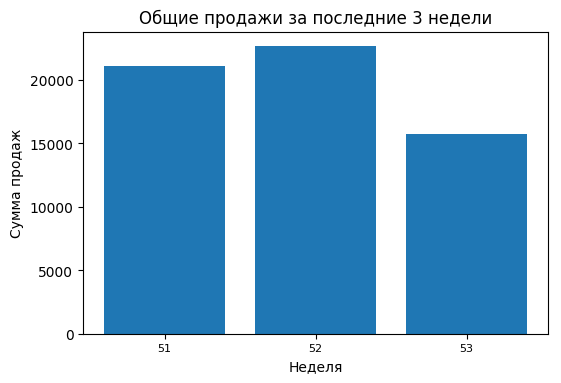

In [61]:
plt.figure(num=None, figsize=(6, 4), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index, values)
plt.ylabel('Сумма продаж', fontsize=10)
plt.xlabel('Неделя', fontsize=10)
plt.xticks(index, by_week.week, fontsize=8, rotation=0)
plt.title('Общие продажи за последние 3 недели')
plt.show()

In [62]:
index = np.arange(len(by_store))
values = by_store.SUM.values

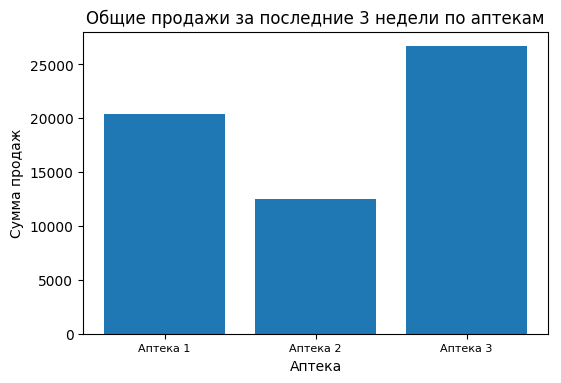

In [63]:
plt.figure(num=None, figsize=(6, 4), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index, values)
plt.ylabel('Сумма продаж', fontsize=10)
plt.xlabel('Аптека', fontsize=10)
plt.xticks(index, by_store.NAME_x, fontsize=8, rotation=0)
plt.title('Общие продажи за последние 3 недели по аптекам')
plt.show()

In [64]:
by_group.sort_values(by='SUM', inplace=True, ascending=True)
index = np.arange(len(by_group))
values = by_group.SUM.values

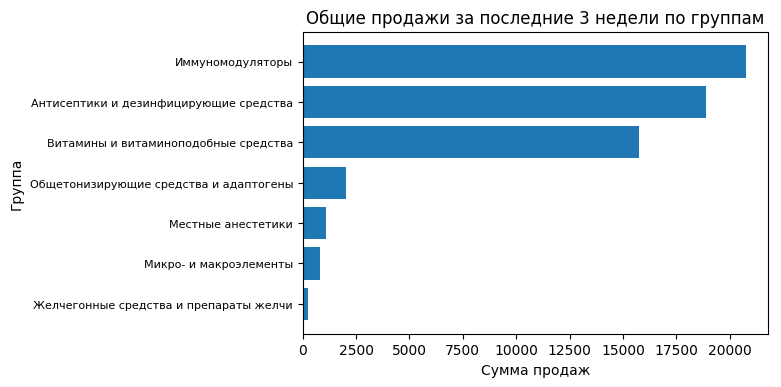

In [65]:
plt.figure(num=None, figsize=(6, 4), dpi=100, facecolor='w', edgecolor='k')
plt.barh(index, values)
plt.ylabel('Группа', fontsize=10)
plt.xlabel('Сумма продаж', fontsize=10)
plt.yticks(index, by_group.FKGNAME, fontsize=8, rotation=0)
plt.title('Общие продажи за последние 3 недели по группам')
plt.show()

### Задание 4

Найти сумму максимальной и средней стоимости покупки за последний месяц от
имеющихся данных.

In [72]:
# Отфильтруем таблицу по месяцу (декабрь) и будем использовать только колонку
# с суммами продаж, используем стандартные функции max() и mean()
max_sum = raw_sales.loc[raw_sales.DATE.dt.month == 12, 'SUM'].max()
mean_sum = raw_sales.loc[raw_sales.DATE.dt.month == 12, 'SUM'].mean()

In [79]:
f'Максимальная стоимость покупки в декабре: {max_sum:.2f}, средняя - {mean_sum:.2f}'

'Максимальная стоимость покупки в декабре: 1032.03, средняя - 77.42'

### Задание 9 

Сформировать многомерный отчет и график загруженности торговых точек по дням
месяца. Постройте линию тренда.

In [8]:
# Введем колонку день месяца в общую таблицу
raw_sales['day_of_month'] = raw_sales.DATE.dt.day

In [9]:
# Введем колонку месяц в общую таблицу
raw_sales['month'] = raw_sales.DATE.dt.month

In [10]:
raw_sales.head()

,DATE,STOREID,PRODID,HOUR,COUNT,SUM,NAME_x,NAME_y,FKGCODE,FKGNAME,day_of_month,month
0,2004-01-01,1,31052,13,1,56.50,Аптека 1,Ингалипт аэроз. бал.аэроз.алюм. 30 мл пач.карт...,247,Антисептики и дезинфицирующие средства,1,1
1,2004-01-01,1,36259,16,1,72.48,Аптека 1,Компливит табл.п.о. бан.полимерн. 60 пач.карто...,198,Витамины и витаминоподобные средства,1,1
2,2004-01-01,1,40345,15,1,15.84,Аптека 1,Линимент бальзамический (по Вишневскому) линим...,247,Антисептики и дезинфицирующие средства,1,1
3,2004-01-01,1,65841,14,1,163.02,Аптека 1,Стрепсилс Плюс спрей доз. фл.с дозат. 20 мл ко...,247,Антисептики и дезинфицирующие средства,1,1
4,2004-01-01,1,82545,13,1,173.32,Аптека 1,"Арбидол-ЛЭНС табл.п.о. 0,1 г бл. 10 кор. 1 Дал...",33,Иммуномодуляторы,1,1


In [11]:
# сгруппируем по месяцу и дню и подсчитаем объем продаж для каждого дня каждого месяца
dom_counts = raw_sales.groupby(['month','day_of_month'], as_index=False).agg({'COUNT':'sum'})

На графике ниже отражен тренд по объемам продаж в зависимости от дней месяца. Сплошная линия показывает среднее количество продаж в день месяца, серый полоса показывает отклонение от среднего.

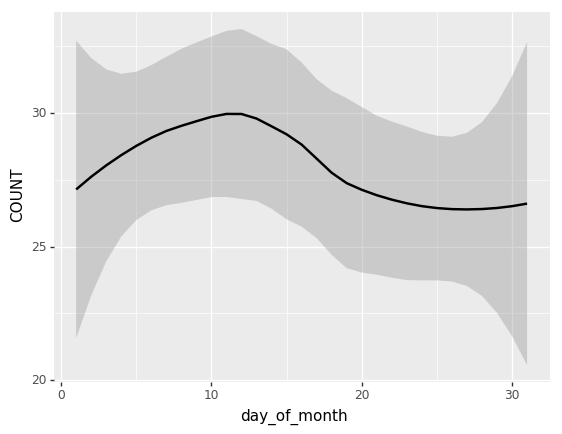

<ggplot: (-9223363310310794436)>

In [13]:
ggplot(dom_counts, aes('day_of_month', 'COUNT'))+stat_smooth(se=True, method='loess')

In [107]:
# сгруппируем по месяцу, аптеке и дню и подсчитаем объем продаж для каждого дня каждого месяца
dom_counts_by_store = raw_sales.groupby(['NAME_x', 'month', 'day_of_month'], as_index=False).agg({'COUNT':'sum'})

Аптека 1


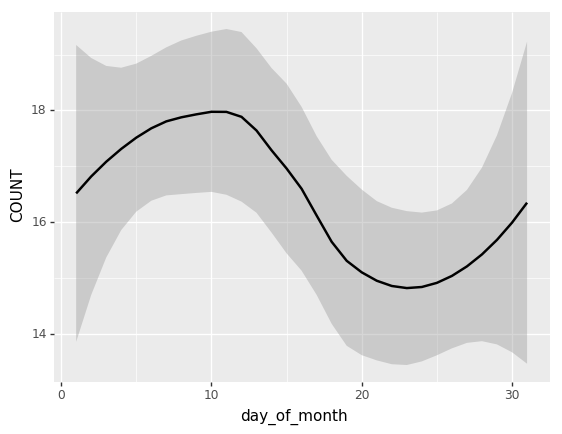

<ggplot: (306313378)>
Аптека 2


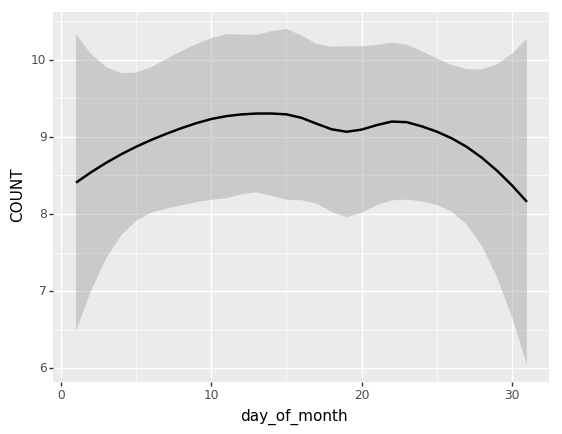

<ggplot: (306419576)>
Аптека 3


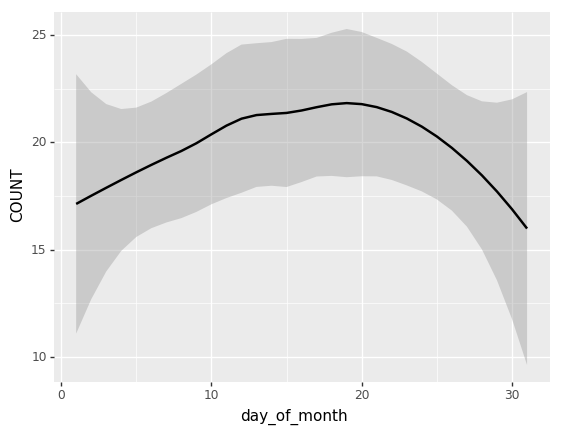

<ggplot: (-9223372036548097276)>


In [108]:
for name in dom_counts_by_store.NAME_x.unique():
    print(name)
    print(ggplot(dom_counts_by_store[dom_counts_by_store.NAME_x == name], 
           aes('day_of_month', 'COUNT'))+stat_smooth(se=True, method='loess'))

### Задание 10

Сформировать многомерный отчет и график загруженности торговых точек по дням месяца за последние три месяца от имеющихся данных. Постройте линию тренда.

In [21]:
# Отфильтруем данные по времени и возьмем только последние 3 месяца
last3_sales = raw_sales[raw_sales.month > 9].copy()

In [22]:
# сгруппируем по месяцу и дню и подсчитаем объем продаж для каждого дня каждого месяца
dom_counts = last3_sales.groupby(['month','day_of_month'], as_index=False).agg({'COUNT':'sum'})

На графике ниже отражен тренд по объемам продаж в зависимости от дней месяца. Сплошная линия показывает среднее количество продаж в день месяца, серый полоса показывает отклонение от среднего.

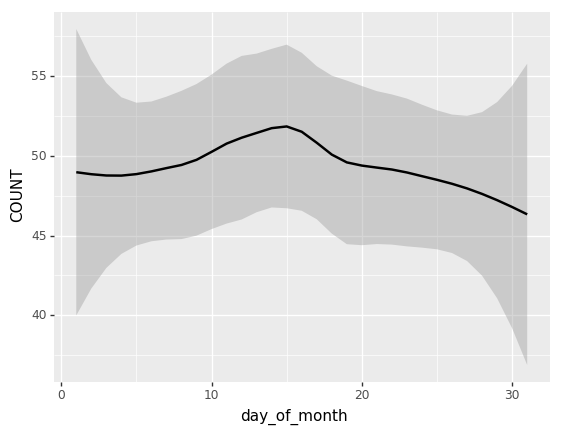

<ggplot: (-9223363310313257398)>

In [24]:
ggplot(dom_counts, aes('day_of_month', 'COUNT'))+stat_smooth(se=True, method='loess')

In [25]:
# сгруппируем по месяцу, аптеке и дню и подсчитаем объем продаж для каждого дня каждого месяца
dom_counts_by_store = last3_sales.groupby(['NAME_x', 'month', 'day_of_month'], 
                                          as_index=False).agg({'COUNT':'sum'})

Аптека 1


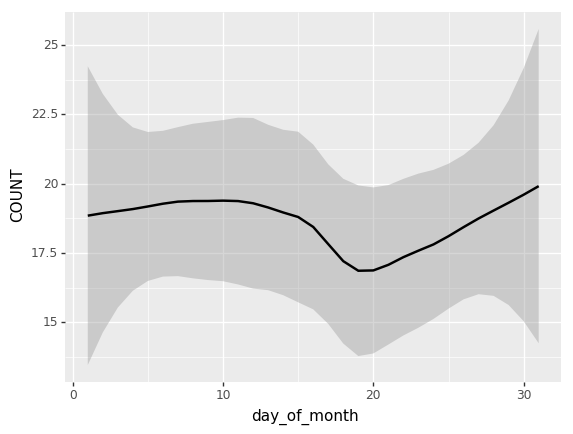

<ggplot: (8726541502058)>
Аптека 2


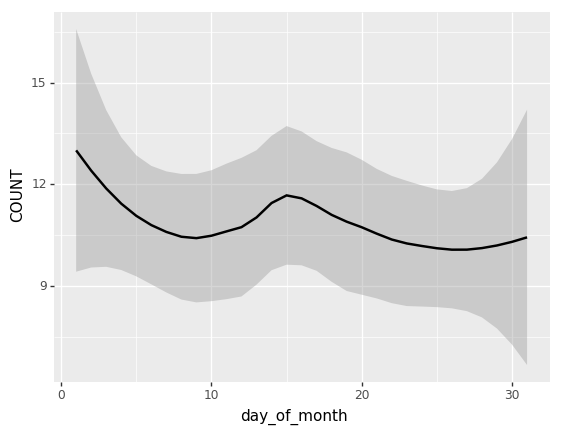

<ggplot: (-9223363310313273705)>
Аптека 3


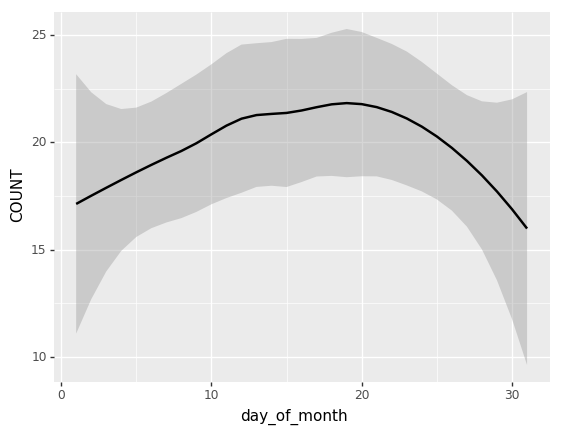

<ggplot: (8726541452629)>


In [26]:
for name in dom_counts_by_store.NAME_x.unique():
    print(name)
    print(ggplot(dom_counts_by_store[dom_counts_by_store.NAME_x == name], 
           aes('day_of_month', 'COUNT'))+stat_smooth(se=True, method='loess'))

### Задание 13

10 самых продаваемых товаров по воскресеньям.

Чтобы найти 10 самых продаваемых товаров по воскресениям, мы отфильтруем данные таким образом, чтобы взять только продажи по воскресениям. Для этого введем дополнительную колонку «день недели» при помощи функциональности библиотеки pandas.

In [29]:
raw_sales['DOW'] = raw_sales.DATE.dt.dayofweek

In [32]:
sundays = raw_sales[raw_sales.DOW == 6].copy()

После этого можно сгруппировать данные по наименованию товара с агрегацией продаж по сумме и отсортировать полученные данные по сумме продаж. 

In [33]:
sundays.head()

,DATE,STOREID,PRODID,HOUR,COUNT,SUM,NAME_x,NAME_y,FKGCODE,FKGNAME,day_of_month,month,DOW
33,2004-01-04,1,487,14,10,22.40,Аптека 1,Аспаркам табл. уп.контурн.яч. 10 Ай Си Эн Лекс...,108,Микро- и макроэлементы,4,1,6
34,2004-01-04,1,2291,14,1,276.80,Аптека 1,Кальций-Д_3 Никомед табл.жев. с апельс. фл. 10...,198,Витамины и витаминоподобные средства,4,1,6
35,2004-01-04,1,11291,11,1,86.94,Аптека 1,"Арбидол-ЛЭНС табл.п.о. 0,05 г уп.контурн.яч. 1...",33,Иммуномодуляторы,4,1,6
36,2004-01-04,1,11931,14,1,13.60,Аптека 1,Аспаркам табл. уп.контурн.яч. 50 пач.картон. 1...,108,Микро- и макроэлементы,4,1,6
37,2004-01-04,1,28551,17,1,15.22,Аптека 1,Желудочно-кишечный сбор сбор лек. фильтр-пак. ...,223,Желчегонные средства и препараты желчи,4,1,6


In [42]:
(sundays.groupby('NAME_y', as_index=False)
     .agg({'COUNT':'sum'})
         .sort_values(by='COUNT', ascending=False)
         .iloc[:10])

,NAME_y,COUNT
11,"Арбидол-ЛЭНС табл.п.о. 0,1 г бл. 10 кор. 1 Дал...",57
78,Интерферон лейкоцитарный человеческий сухой по...,49
114,Компливит табл.п.о. бан.полимерн. 60 пач.карто...,46
97,Каметон аэроз. бал.аэроз. 45 г [с нас.наз.] па...,36
89,Календулы настойка настойка фл.темн.стекл. 40 ...,33
168,Фенюльс капс. бл. 10 кор. 1 Ranbaxy,31
73,Ингалипт аэроз. бал.аэроз.алюм. 30 мл [с доз.у...,31
90,Календулы настойка настойка фл.темн.стекл. 40 ...,29
80,Интерферон лейкоцитарный человеческий сухой по...,27
38,Бифидумбактерин сухой пор.лиоф.д/р-ра для прие...,24


### Задание 14

 5 самых популярных товаров в каждой товарной группе

Чтобы найти 5 самых популярных товаров в каждой товарной группе за по-следнюю неделю, необходимо сгруппировать данные по группе товаров и названию отдельно взятого товара, провести агрегацию по количеству продаж (сумма) отсор-тировать и взять первые пять рядов для каждой товарной группы.

In [47]:
grouped = (raw_sales.groupby(['FKGNAME', 'NAME_y'], as_index=False)
               .agg({'COUNT': 'sum'})
               .sort_values(by=['FKGNAME', 'COUNT'], ascending=False)
               .reset_index(drop=True))

In [48]:
grouped.head()

,FKGNAME,NAME_y,COUNT
0,Общетонизирующие средства и адаптогены,"Мумие алтайское очищенное табл. 0,2 г уп.конту...",116
1,Общетонизирующие средства и адаптогены,Овса настойка настойка фл.темн.стекл. 100 мл к...,112
2,Общетонизирующие средства и адаптогены,Прополис мазь туба 30 г пач.картон. 1 Московск...,47
3,Общетонизирующие средства и адаптогены,"Мумие алтайское очищенное табл. 0,2 г уп.конту...",37
4,Общетонизирующие средства и адаптогены,Болюсы Хуато пилюли бан. 80 г [с доз.ложкой] к...,27


In [56]:
for group in grouped.FKGNAME.unique():
    print(group)
    print(grouped.loc[grouped.FKGNAME == group, 'NAME_y'].values[:5])
    print()

Общетонизирующие средства и адаптогены
['Мумие алтайское очищенное табл. 0,2 г уп.контурн.б/яч. 10 Эвалар'
 'Овса настойка настойка фл.темн.стекл. 100 мл кор. 1 Санкт-Петербургская фармфабрика'
 'Прополис мазь туба 30 г пач.картон. 1 Московская фармфабрика'
 'Мумие алтайское очищенное табл. 0,2 г уп.контурн.б/яч. 10 пач.картон. 2 Эвалар'
 'Болюсы Хуато пилюли бан. 80 г [с доз.ложкой] кор. 1 Qixing Pharmaceutical Co.']

Микро- и макроэлементы
['Панангин табл.п.о. фл. 50 кор. 1 Gedeon Richter'
 'Аспаркам табл. уп.контурн.яч. 10 Ай Си Эн Лексредства'
 'Аспаркам табл. уп.контурн.б/яч. 10 Медисорб'
 'Аспаркам табл. уп.контурн.яч. 50 пач.картон. 1 Галичфарм'
 'Аспаркам таблетки табл. уп.контурн.яч. 50 пач.картон. 1 Луганский ХФЗ']

Местные анестетики
['Меновазин р-р спирт.наружн. фл.темн.стекл. 40 мл Тульская фармфабрика'
 'Меновазин р-р спирт.наружн. фл.темн.стекл. 40 мл Московская фармфабрика'
 'Меновазин р-р спирт.наружн. фл.темн.стекл. 40 мл Тверская фармфабрика'
 'Калгель гель зубн. туб

### Задание 16

Найти товары, дающие 50% объема продаж.

In [13]:
grouped = (raw_sales.groupby('NAME_y', as_index=False)['COUNT']
               .sum()
               .sort_values(by='COUNT', ascending=False)
               .reset_index(drop=True)
               .assign(cum_sum=lambda x: x.COUNT.cumsum()))

In [14]:
grouped.head()

,NAME_y,COUNT,cum_sum
0,"Арбидол-ЛЭНС табл.п.о. 0,1 г бл. 10 кор. 1 Дал...",429,429
1,Интерферон лейкоцитарный человеческий сухой по...,315,744
2,Календулы настойка настойка фл.темн.стекл. 40 ...,304,1048
3,Фенюльс капс. бл. 10 кор. 1 Ranbaxy,296,1344
4,Компливит табл.п.о. бан.полимерн. 60 пач.карто...,295,1639


In [17]:
first_50pct = grouped.loc[(grouped.cum_sum <= grouped.cum_sum.max() // 2), ['NAME_y', 'COUNT']]

In [20]:
first_50pct.sort_values(by='COUNT', inplace=True)

In [21]:
index = np.arange(len(first_50pct))
values = first_50pct.COUNT.values

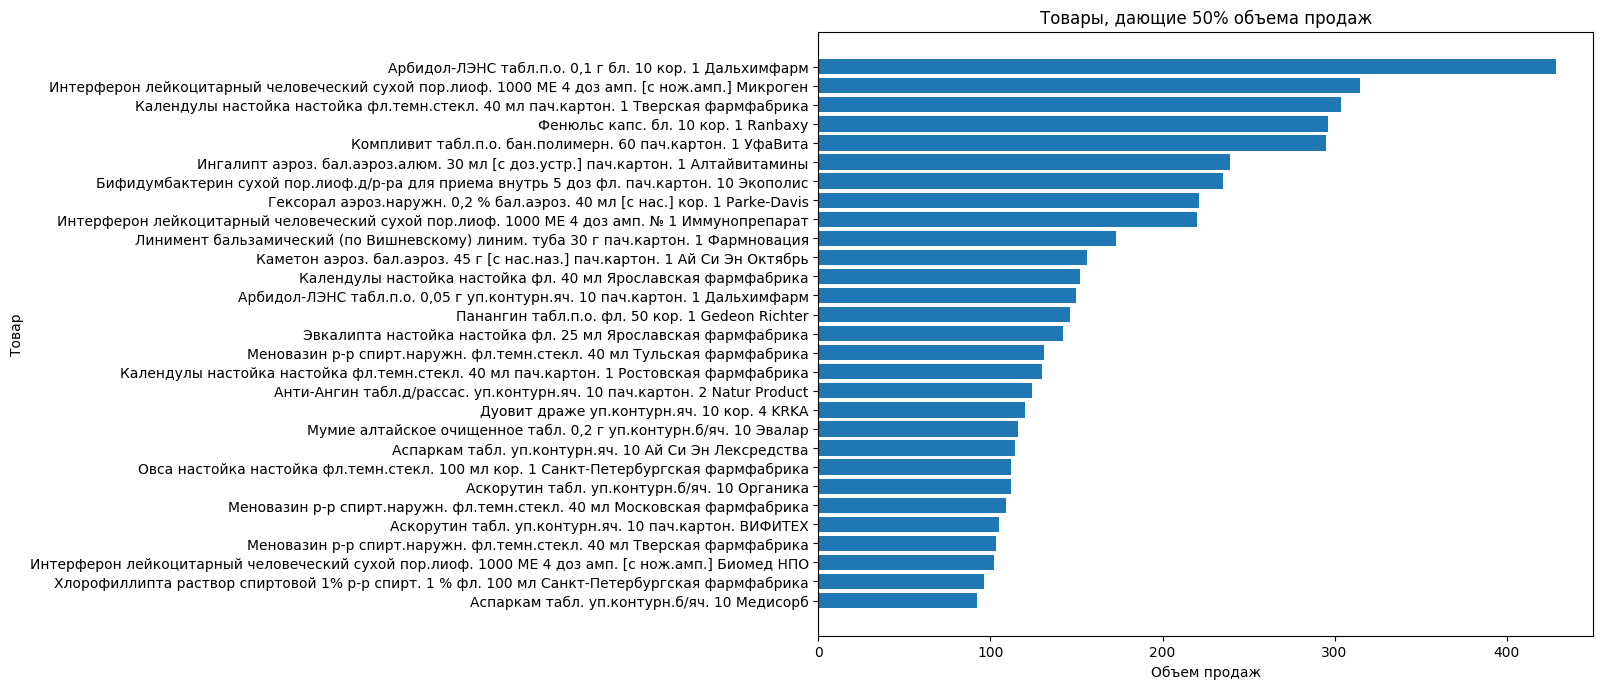

In [24]:
plt.figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.barh(index, values)
plt.ylabel('Товар', fontsize=10)
plt.xlabel('Объем продаж', fontsize=10)
plt.yticks(index, first_50pct.NAME_y, fontsize=10, rotation=0)
plt.title('Товары, дающие 50% объема продаж')
plt.show()

### Задание 17

Найти товары, дающие 50% объема продаж, но за последние 3 месяца от имеющихся данных.

In [26]:
grouped = (raw_sales.loc[raw_sales.DATE.dt.month > 9]
               .groupby('NAME_y', as_index=False)['COUNT']
                   .sum()
                   .sort_values(by='COUNT', ascending=False)
                   .reset_index(drop=True)
                   .assign(cum_sum=lambda x: x.COUNT.cumsum()))

In [27]:
grouped.head()

,NAME_y,COUNT,cum_sum
0,Интерферон лейкоцитарный человеческий сухой по...,297,297
1,"Арбидол-ЛЭНС табл.п.о. 0,1 г бл. 10 кор. 1 Дал...",281,578
2,Ингалипт аэроз. бал.аэроз.алюм. 30 мл [с доз.у...,134,712
3,Компливит табл.п.о. бан.полимерн. 60 пач.карто...,133,845
4,"Гексорал аэроз.наружн. 0,2 % бал.аэроз. 40 мл ...",119,964


In [28]:
first_50pct = grouped.loc[(grouped.cum_sum <= grouped.cum_sum.max() // 2), ['NAME_y', 'COUNT']]

In [29]:
first_50pct.sort_values(by='COUNT', inplace=True)

In [30]:
index = np.arange(len(first_50pct))
values = first_50pct.COUNT.values

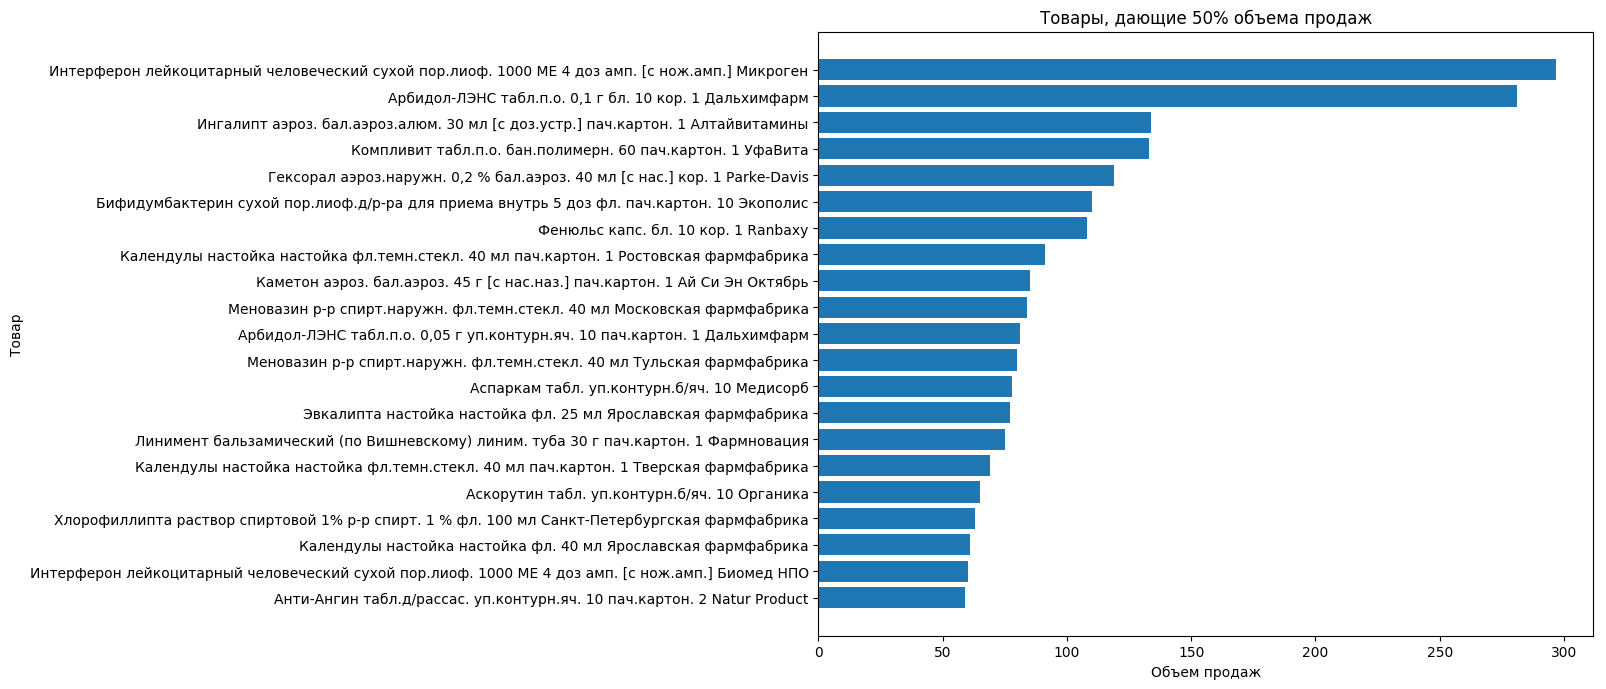

In [31]:
plt.figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.barh(index, values)
plt.ylabel('Товар', fontsize=10)
plt.xlabel('Объем продаж', fontsize=10)
plt.yticks(index, first_50pct.NAME_y, fontsize=10, rotation=0)
plt.title('Товары, дающие 50% объема продаж')
plt.show()